In [ ]:
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

In [ ]:
data = {
    'Title': [
        'Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E',
        'Movie F', 'Movie G', 'Movie H', 'Movie I', 'Movie J'
    ],
    'Duration': [90, 95, 150, 160, 170, 200, 100, 105, 110, 210],
    'Rating': [7.0, 6.8, 8.5, 8.7, 8.6, 9.0, 6.5, 6.7, 6.9, 9.1],
    'Year': [2000, 2002, 2010, 2011, 2012, 2015, 2003, 2005, 2006, 2016]
}


In [ ]:
df=pandas.DataFrame(data)
print('Original Data -')
print(df)

Original Data -
     Title  Duration  Rating  Year
0  Movie A        90     7.0  2000
1  Movie B        95     6.8  2002
2  Movie C       150     8.5  2010
3  Movie D       160     8.7  2011
4  Movie E       170     8.6  2012
5  Movie F       200     9.0  2015
6  Movie G       100     6.5  2003
7  Movie H       105     6.7  2005
8  Movie I       110     6.9  2006
9  Movie J       210     9.1  2016


In [ ]:
X=df[['Duration','Rating','Year']]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
db=DBSCAN(eps=1.2,min_samples=2)
df['Cluster']=db.fit_predict(X_scaled)

In [ ]:
print('Clustered values-')
print(df)

Clustered values-
     Title  Duration  Rating  Year  Cluster
0  Movie A        90     7.0  2000        0
1  Movie B        95     6.8  2002        0
2  Movie C       150     8.5  2010        1
3  Movie D       160     8.7  2011        1
4  Movie E       170     8.6  2012        1
5  Movie F       200     9.0  2015        1
6  Movie G       100     6.5  2003        0
7  Movie H       105     6.7  2005        0
8  Movie I       110     6.9  2006        0
9  Movie J       210     9.1  2016        1


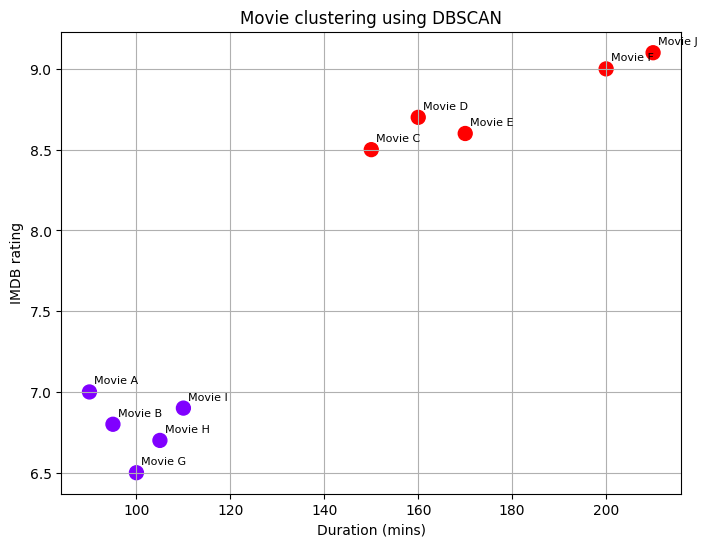

In [ ]:
pyplot.figure(figsize=(8,6))
pyplot.scatter(df['Duration'],df['Rating'],c=df['Cluster'],cmap='rainbow',s=100)
pyplot.xlabel('Duration (mins)')
pyplot.ylabel('IMDB rating')
pyplot.title('Movie clustering using DBSCAN')
for i,title in enumerate(df['Title']):
  pyplot.annotate(title,(df['Duration'][i]+1,df['Rating'][i]+0.05),fontsize=8)

pyplot.grid(True)
pyplot.show()
